### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 3
### Due: Monday, Feb 14th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 14th.

---

## Problem 1

Consider a family with two children. Assume that the probability of females and males being born is equal, i.e. $p(F)=0.5$ and $p(M)=0.5$. Remember that "given" means your calculation is conditioned on some already fixed data or outcome. 

1) What is the probability of one male and one female **GIVEN** that the first child is male. 

2) What is the probability of two females **GIVEN** that at least one child is female.

3) What is the probability of two females **GIVEN** that the older child is female.

You will find it easiest to answer these questions by sketching a "tree diagram" to visualize the options for the oldest child, and the branching options for the youngest child. 

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

1. options: Male - Female or Male - Male ||| 
   probability of option 2 is 0.5
   
2. options: Female - Female, Female - Male, Male - Female |||
   probability of option 1 is 1/3
   
3. options: Female - Female, Female - Male |||
   probability of option 1 is 0.5

## Problem 2

The data in hw3_populations.txt (source: scipy-lectures.org) describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years:


create a Python script to

1. plot hw3_populations.txt (using matlab)


2. calculate and output:

    a) The mean, median and std of the populations of each species for the years in the period.
    
    b) The year each species had the largest population.
    
    c) The species that has the largest population for each year. (Hint: argsort & fancy indexing of np.array(['H', 'L', 'C']))
    
    d) The years were any of the populations is above 50000. (Hint: comparisons and np.any)
    
    e) The top 2 years for each species when they had the lowest populations. (Hint: argsort, fancy indexing)
    
    f) Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation (see help(np.corrcoef)).



### Solution



In [1]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('../../homework_notebooks/hw3_populations.txt')
year, hares, lynxes, carrots = data.T

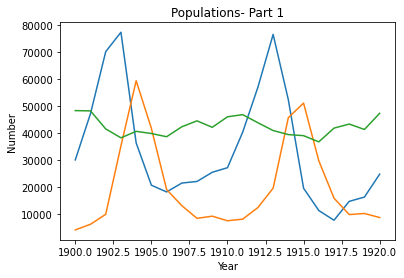

In [22]:
plt.plot(year, hares, label="hares")
plt.plot(year, lynxes, label="lynxes")
plt.plot(year, carrots, label="carrots")
plt.ylabel("Number")
plt.xlabel("Year")
plt.title("Populations- Part 1")
plt.show()

In [23]:
print("HARES")
print("mean: " + str(np.average(hares)))
print("median: " + str(np.median(hares)))
print("std: " + str(np.std(hares)))
print("year of heighest pop: " + str(year[np.argmax(hares)]))

print("\nLYNXES")
print("mean: " + str(np.average(lynxes)))
print("median: " + str(np.median(lynxes)))
print("std: " + str(np.std(lynxes)))
print("year of heighest pop: " + str(year[np.argmax(lynxes)]))

print("\nCARROTS")
print("mean: " + str(np.average(carrots)))
print("median: " + str(np.median(carrots)))
print("std: " + str(np.std(carrots)))
print("year of heighest pop: " + str(year[np.argmax(carrots)]))

HARES
mean: 34080.95238095238
median: 25400.0
std: 20897.906458089667
year of heighest pop: 1903.0

LYNXES
mean: 20166.666666666668
median: 12300.0
std: 16254.591536908763
year of heighest pop: 1904.0

CARROTS
mean: 42400.0
median: 41800.0
std: 3322.5062255844787
year of heighest pop: 1900.0


In [24]:
maxInYear = np.array(('Hares', 'Lynxes', 'Carrots'))[np.argmax(data[:,1:], axis=1)]
print("Max in each year")
print(maxInYear)

Max in each year
['Carrots' 'Carrots' 'Hares' 'Hares' 'Lynxes' 'Lynxes' 'Carrots' 'Carrots'
 'Carrots' 'Carrots' 'Carrots' 'Carrots' 'Hares' 'Hares' 'Hares' 'Lynxes'
 'Carrots' 'Carrots' 'Carrots' 'Carrots' 'Carrots']


In [12]:
print("Years with any of the populations above 50000")
print(year[np.any(data[:,1:]>50000, axis=1)])

Years with any of the populations above 50000
[1902. 1903. 1904. 1912. 1913. 1914. 1915.]


In [18]:
print("Top 2 years for hares")
print(str(int(year[np.argsort(hares)[-2]])) + " and " + str(int(year[np.argsort(hares)[-1]])))
print("\nTop 2 years for lynxes")
print(str(int(year[np.argsort(lynxes)[-2]])) + " and " + str(int(year[np.argsort(lynxes)[-1]])))
print("\nTop 2 years for carrots")
print(str(int(year[np.argsort(carrots)[-2]])) + " and " + str(int(year[np.argsort(carrots)[-1]])))

Top 2 years for hares
1913 and 1903

Top 2 years for lynxes
1915 and 1904

Top 2 years for carrots
1901 and 1900


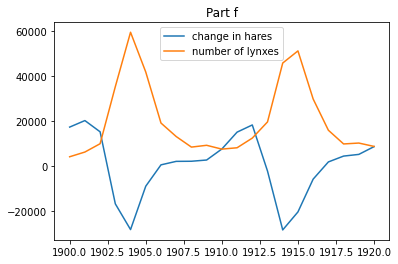

[[ 1.         -0.91792485]
 [-0.91792485  1.        ]]


In [21]:
plt.plot(year, np.gradient(hares), label='change in hares')
plt.plot(year, lynxes, label='number of lynxes')
plt.legend()
plt.title("Part f")
plt.show()

print(np.corrcoef(np.gradient(hares), lynxes))